<a href="https://colab.research.google.com/github/prakharrathi25/MNIST-Image-Recognition/blob/master/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Image Recognition using Keras

### Importing necessary libraries

In [0]:
# Data Manipulation library
import numpy as np 
import pandas as pd

# Data visualisation libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

# Image Manipulation 
import cv2 as cv

# Evaluation and Splitting 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Deep Learning Libraries
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, Lambda, MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


In [0]:
# Uploading Data 
from google.colab import files 
files.upload() 

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Loading Data 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Make original data copies 
train_og = train_data.copy() 
test_og = test_data.copy() 
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [0]:
# Sample of the data 
print(train_data.head())
print(test_data.head())

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]


In [0]:
# Extract only the features 
X = train_data.drop(['label'], axis = 1).values
y = train_data['label'].values
test_X = test_data.values

In [0]:
# Grayscale Normalization 
X = X / 255.0
test_X = test_X / 255.0

In [0]:
# Reshape the image data into 3 dimensions (height = 28pixels, width = 28px, 1)
# because 28 x 28 = 784 
X = X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

### Encoding

In [0]:
# One hot encode the labels. There are 10 labels so we add 10 new dimensions
y = to_categorical(y)
print(y.shape)

(42000, 10)


In [0]:
# Train and validation splits 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=324)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(31500, 28, 28, 1) (31500, 10) (10500, 28, 28, 1) (10500, 10)


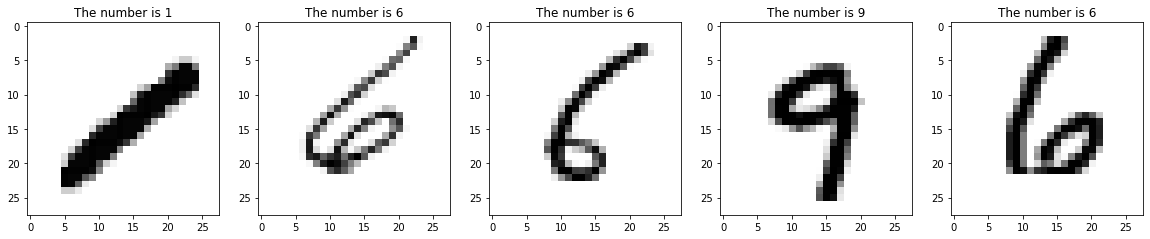

In [0]:
# Visulaisation of the data 
images = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(images[i], cmap = 'binary')
    digit = y_train[i].argmax()   # finding the number where the array has a 1 which will be the max value
    ax.set(title = f"The number is {digit}")

## Building the CNN

In [0]:
# Important parameters
epochs = 50
batch_size = 64

In [0]:
# Building the CNN Model
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) # MaxPoolinglayer
#model.add(BatchNormalization)
model.add(Conv2D(filters=128, kernel_size = (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
#model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


### Data Augmentation

In [0]:
# Using to prevent overfitting 

datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False,
                             rotation_range=10, 
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)

#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_val, y_val, batch_size=batch_size)

In [0]:
# Model training 
model.fit(X, y, batch_size=batch_size, validation_split=0.2, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 8400 samples
Epoch 1/10





33600/33600 [==============================] - 207s 6ms/step - loss: 0.2537 - acc: 0.9187 - val_loss: 0.0749 - val_acc: 0.9774
Epoch 2/10
33600/33600 [==============================] - 206s 6ms/step - loss: 0.0761 - acc: 0.9771 - val_loss: 0.0862 - val_acc: 0.9736
Epoch 3/10
33600/33600 [==============================] - 205s 6ms/step - loss: 0.0542 - acc: 0.9831 - val_loss: 0.0666 - val_acc: 0.9820
Epoch 4/10
33600/33600 [==============================] - 204s 6ms/step - loss: 0.0405 - acc: 0.9873 - val_loss: 0.0732 - val_acc: 0.9811
Epoch 5/10
33600/33600 [==============================] - 205s 6ms/step - loss: 0.0385 - acc: 0.9885 - val_loss: 0.0800 - val_acc: 0.9795
Epoch 6/10
33600/33600 [==============================] - 205s 6ms/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0465 - val_acc: 0.9883
Epoch 7/10
33600/3360

In [0]:
# Fit the model 
model_history = model.fit_generator(train_gen,
                                    epochs = epochs,
                                    steps_per_epoch = X_train.shape[0] // batch_size,
                                    validation_data = test_gen,
                                    validation_steps = X_val.shape[0] // batch_size)

Epoch 1/50
492/492 [==============================] - 205s 417ms/step - loss: 0.1248 - acc: 0.9649 - val_loss: 0.0702 - val_acc: 0.9785
Epoch 2/50
492/492 [==============================] - 204s 415ms/step - loss: 0.0761 - acc: 0.9771 - val_loss: 0.0620 - val_acc: 0.9817
Epoch 3/50
492/492 [==============================] - 203s 412ms/step - loss: 0.0615 - acc: 0.9822 - val_loss: 0.0541 - val_acc: 0.9851
Epoch 4/50
492/492 [==============================] - 204s 415ms/step - loss: 0.0560 - acc: 0.9829 - val_loss: 0.0583 - val_acc: 0.9842
Epoch 5/50
492/492 [==============================] - 203s 412ms/step - loss: 0.0504 - acc: 0.9850 - val_loss: 0.0469 - val_acc: 0.9860
Epoch 6/50
492/492 [==============================] - 203s 413ms/step - loss: 0.0483 - acc: 0.9852 - val_loss: 0.0545 - val_acc: 0.9843
Epoch 7/50
492/492 [==============================] - 204s 414ms/step - loss: 0.0477 - acc: 0.9859 - val_loss: 0.0547 - val_acc: 0.9850
Epoch 8/50
492/492 [============================

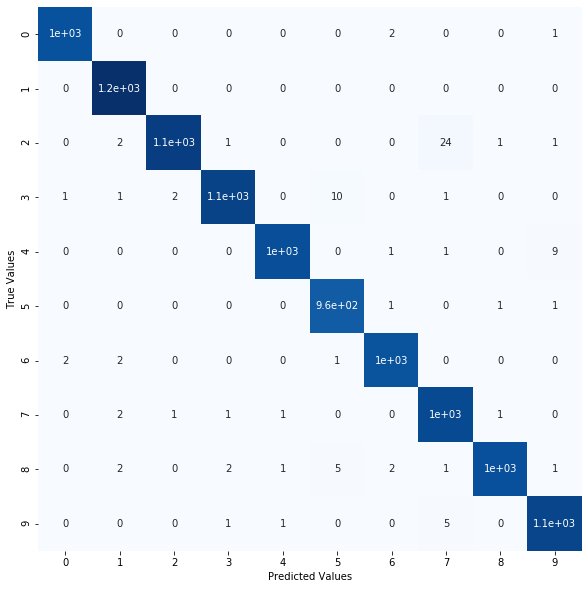

In [0]:
# Confusion Matrix 
ig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_val) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_val, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


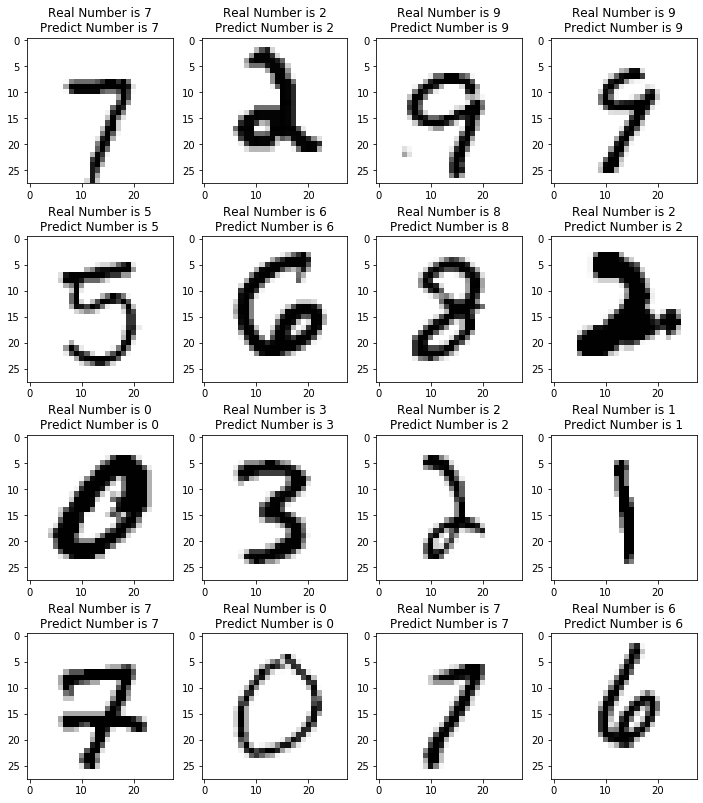

In [0]:
# Prediction 
y_pred = model.predict(X_val)
X_val__ = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [0]:
pred = model.predict_classes(test_X, verbose = 1)